# Лабораторная работа №3: Обработка признаков (часть 2).

Текстовое описание набора данных

Датасет `laptop_price.csv` (<a href='https://www.kaggle.com/muhammetvarl/laptop-price'>источник</a>) содержит информацию о характеристиках ноутбуков.

Параметры:
- *laptop_ID* - уникальный идентификатор ноутбука,
- *Company* - производитель ноутбука,
- *Product* - название модели ноутубка,
- *TypeName* - тип ноутбука,
- *Inches* - размер дисплея ноутбука в дюймах,
- *ScreenResolution* - разрешение экрана ноутбука,
- *Cpu* - процессор ноутбука,
- *Ram* - оперативная память ноутбука,
- *Memory* - тип и объём жёсткого диска (или жёстких дисков) ноутбука,
- *Gpu* - графический процессор ноутбука,
- *OpSys* - операционная система, установленная на ноутбуке,
- *Weight* - масса ноутбука,
- *Price_euros* - стоимость ноутбука в евро.

<a id="2"></a>
## Подключение библиотек

In [56]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LinearRegression, Lasso
import seaborn as sns
import warnings
import math

#from sklearn.preprocessing import OneHotEncoder
#from sklearn.ensemble import RandomForestRegressor
#from sklearn.model_selection import train_test_split
#from sklearn.metrics import mean_squared_error

warnings.simplefilter('ignore')

In [5]:
!pip install gmdh
from gmdh import Combi

<a id="3"></a>
## Загрузка датасета из файла `laptop_price.csv`

In [6]:
data = pd.read_csv('laptop_price.csv', encoding='windows-1251')

Выведем первые 5 строк датасета для проверки корректного импорта данных:

In [7]:
data.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


Видим, что данные загружены корректно. Разбиения по строкам и столбцам произведены верно. Проблем с кодировкой не возникло.

## Обработка нестандартных признаков

Ещё раз посмотрим на наши данные:

In [8]:
data.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


Выведем типы данных для всех столбцов:

In [9]:
data.dtypes

laptop_ID             int64
Company              object
Product              object
TypeName             object
Inches              float64
ScreenResolution     object
Cpu                  object
Ram                  object
Memory               object
Gpu                  object
OpSys                object
Weight               object
Price_euros         float64
dtype: object

<a id="7_1"></a>
### Признак `Ram`

Заметим, что признак `Ram` можно сделать целочисленным, приведя все значения к однйо единице измерения и убрав её название из самих значений. Информативность от этого не уменьшится, а оцеивать целочисленный признак будет намного удобнее, чем строковый. Посмотрим, какие единицы измерения используются в значениях признака `Ram`.

In [10]:
data['Ram'].unique()

array(['8GB', '16GB', '4GB', '2GB', '12GB', '6GB', '32GB', '24GB', '64GB'],
      dtype=object)

Так как все значения измеряются в GB, просто уберем две этих буквы из значений, а информацию о единице измерения перенесём в название признака:

In [11]:
data['Ram'] = data['Ram'].map(lambda x:int(x[:-2]))
data.rename(columns={'Ram': 'Ram_GB'}, inplace=True)
data.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram_GB,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


<a id="7_2"></a>
### Признак `Weight`

Проведём аналогичные преобразования с признаком `Weight`. Проверим, есть ли значения с другой единицей измерения помимо kg:

In [12]:
data[data['Weight'].apply(lambda x: not x.endswith('kg'))]

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram_GB,Memory,Gpu,OpSys,Weight,Price_euros


Записи с другими единицами измерения не найдены. Удаляем буквы kg из значений и информацию о единице измерения переносим в название признака:

In [13]:
data['Weight'] = data['Weight'].map(lambda x:float(x[:-2]))
data.rename(columns={'Weight': 'Weight_kg'}, inplace=True)
data.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram_GB,Memory,Gpu,OpSys,Weight_kg,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60


<a id="7_3"></a>
### Признак `ScreenResolution`

Признак `ScreenResolution` заменим на несколько отдельных признаков: `ScreenType`, `ScreenWidth`, `ScreenHeight`. Первый признак останется строковым, два остальных будут целочисленными.

In [14]:
data['ScreenResolution'].unique()

array(['IPS Panel Retina Display 2560x1600', '1440x900',
       'Full HD 1920x1080', 'IPS Panel Retina Display 2880x1800',
       '1366x768', 'IPS Panel Full HD 1920x1080',
       'IPS Panel Retina Display 2304x1440',
       'IPS Panel Full HD / Touchscreen 1920x1080',
       'Full HD / Touchscreen 1920x1080',
       'Touchscreen / Quad HD+ 3200x1800',
       'IPS Panel Touchscreen 1920x1200', 'Touchscreen 2256x1504',
       'Quad HD+ / Touchscreen 3200x1800', 'IPS Panel 1366x768',
       'IPS Panel 4K Ultra HD / Touchscreen 3840x2160',
       'IPS Panel Full HD 2160x1440',
       '4K Ultra HD / Touchscreen 3840x2160', 'Touchscreen 2560x1440',
       '1600x900', 'IPS Panel 4K Ultra HD 3840x2160',
       '4K Ultra HD 3840x2160', 'Touchscreen 1366x768',
       'IPS Panel Full HD 1366x768', 'IPS Panel 2560x1440',
       'IPS Panel Full HD 2560x1440',
       'IPS Panel Retina Display 2736x1824', 'Touchscreen 2400x1600',
       '2560x1440', 'IPS Panel Quad HD+ 2560x1440',
       'IPS Panel 

In [15]:
data['ScreenType'] = data['ScreenResolution'].apply(lambda x: x[:x.rfind(' ')] if x.rfind(' ') != -1 else '-')
data['ScreenWidth'] = data['ScreenResolution'].apply(lambda x: int(x[x.rfind(' ') + 1: x.rfind('x')]))
data['ScreenHeight'] = data['ScreenResolution'].apply(lambda x: int(x[x.rfind('x') + 1:]))
data['ScreenRes'] = data['ScreenWidth'].apply(str) + 'x' + data['ScreenHeight'].apply(str)
data[['ScreenResolution', 'ScreenType', 'ScreenWidth', 'ScreenHeight', 'ScreenRes']].head(10)

,ScreenResolution,ScreenType,ScreenWidth,ScreenHeight,ScreenRes
0,IPS Panel Retina Display 2560x1600,IPS Panel Retina Display,2560,1600,2560x1600
1,1440x900,-,1440,900,1440x900
2,Full HD 1920x1080,Full HD,1920,1080,1920x1080
3,IPS Panel Retina Display 2880x1800,IPS Panel Retina Display,2880,1800,2880x1800
4,IPS Panel Retina Display 2560x1600,IPS Panel Retina Display,2560,1600,2560x1600
5,1366x768,-,1366,768,1366x768
6,IPS Panel Retina Display 2880x1800,IPS Panel Retina Display,2880,1800,2880x1800
7,1440x900,-,1440,900,1440x900
8,Full HD 1920x1080,Full HD,1920,1080,1920x1080
9,IPS Panel Full HD 1920x1080,IPS Panel Full HD,1920,1080,1920x1080


In [16]:
data.drop(['ScreenResolution'], axis=1, inplace=True)
data.head()

,laptop_ID,Company,Product,TypeName,Inches,Cpu,Ram_GB,Memory,Gpu,OpSys,Weight_kg,Price_euros,ScreenType,ScreenWidth,ScreenHeight,ScreenRes
0,1,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,IPS Panel Retina Display,2560,1600,2560x1600
1,2,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,-,1440,900,1440x900
2,3,HP,250 G6,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,Full HD,1920,1080,1920x1080
3,4,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,IPS Panel Retina Display,2880,1800,2880x1800
4,5,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,IPS Panel Retina Display,2560,1600,2560x1600


<a id="7_4"></a>
### Признак `Cpu`

Признак `Cpu` заменим на 2 отдельных признака: `Сpu_type` и `Cpu_GHz`. Первый признак останется строковым, второй будет вещественным. Убедимся перед преобразованиями, что нет значений с единицей измерения, отличной от GHz.

In [17]:
data[data['Cpu'].apply(lambda x: not x.endswith('GHz'))]

,laptop_ID,Company,Product,TypeName,Inches,Cpu,Ram_GB,Memory,Gpu,OpSys,Weight_kg,Price_euros,ScreenType,ScreenWidth,ScreenHeight,ScreenRes


In [18]:
data['Cpu_type'] = data['Cpu'].apply(lambda x: x[:x.rfind(' ')])
data['Cpu_GHz'] = data['Cpu'].apply(lambda x: float(x[x.rfind(' ') + 1: -3]))
data[['Cpu', 'Cpu_type', 'Cpu_GHz']].head(10)

,Cpu,Cpu_type,Cpu_GHz
0,Intel Core i5 2.3GHz,Intel Core i5,2.3
1,Intel Core i5 1.8GHz,Intel Core i5,1.8
2,Intel Core i5 7200U 2.5GHz,Intel Core i5 7200U,2.5
3,Intel Core i7 2.7GHz,Intel Core i7,2.7
4,Intel Core i5 3.1GHz,Intel Core i5,3.1
5,AMD A9-Series 9420 3GHz,AMD A9-Series 9420,3.0
6,Intel Core i7 2.2GHz,Intel Core i7,2.2
7,Intel Core i5 1.8GHz,Intel Core i5,1.8
8,Intel Core i7 8550U 1.8GHz,Intel Core i7 8550U,1.8
9,Intel Core i5 8250U 1.6GHz,Intel Core i5 8250U,1.6


In [19]:
data.drop(['Cpu'], axis=1, inplace=True)
data.head()

,laptop_ID,Company,Product,TypeName,Inches,Ram_GB,Memory,Gpu,OpSys,Weight_kg,Price_euros,ScreenType,ScreenWidth,ScreenHeight,ScreenRes,Cpu_type,Cpu_GHz
0,1,Apple,MacBook Pro,Ultrabook,13.3,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,IPS Panel Retina Display,2560,1600,2560x1600,Intel Core i5,2.3
1,2,Apple,Macbook Air,Ultrabook,13.3,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,-,1440,900,1440x900,Intel Core i5,1.8
2,3,HP,250 G6,Notebook,15.6,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,Full HD,1920,1080,1920x1080,Intel Core i5 7200U,2.5
3,4,Apple,MacBook Pro,Ultrabook,15.4,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,IPS Panel Retina Display,2880,1800,2880x1800,Intel Core i7,2.7
4,5,Apple,MacBook Pro,Ultrabook,13.3,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,IPS Panel Retina Display,2560,1600,2560x1600,Intel Core i5,3.1


<a id="7_5"></a>
### Признак `Gpu`

Признак `Gpu` заменим на 2 отдельных признака: `Gpu_producer` и `Gpu_model`. Оба признака будут строковыми. Однако выделение категориального признака `Gpu_producer` может оказаться полезным при дальнейшем анализе данных.

In [20]:
data['Gpu_producer'] = data['Gpu'].apply(lambda x: x[:x.find(' ')])
data['Gpu_model'] = data['Gpu'].apply(lambda x: x[x.find(' ') + 1:])
data[['Gpu', 'Gpu_producer', 'Gpu_model']].head(10)

,Gpu,Gpu_producer,Gpu_model
0,Intel Iris Plus Graphics 640,Intel,Iris Plus Graphics 640
1,Intel HD Graphics 6000,Intel,HD Graphics 6000
2,Intel HD Graphics 620,Intel,HD Graphics 620
3,AMD Radeon Pro 455,AMD,Radeon Pro 455
4,Intel Iris Plus Graphics 650,Intel,Iris Plus Graphics 650
5,AMD Radeon R5,AMD,Radeon R5
6,Intel Iris Pro Graphics,Intel,Iris Pro Graphics
7,Intel HD Graphics 6000,Intel,HD Graphics 6000
8,Nvidia GeForce MX150,Nvidia,GeForce MX150
9,Intel UHD Graphics 620,Intel,UHD Graphics 620


In [21]:
data.drop(['Gpu'], axis=1, inplace=True)
data.head()

,laptop_ID,Company,Product,TypeName,Inches,Ram_GB,Memory,OpSys,Weight_kg,Price_euros,ScreenType,ScreenWidth,ScreenHeight,ScreenRes,Cpu_type,Cpu_GHz,Gpu_producer,Gpu_model
0,1,Apple,MacBook Pro,Ultrabook,13.3,8,128GB SSD,macOS,1.37,1339.69,IPS Panel Retina Display,2560,1600,2560x1600,Intel Core i5,2.3,Intel,Iris Plus Graphics 640
1,2,Apple,Macbook Air,Ultrabook,13.3,8,128GB Flash Storage,macOS,1.34,898.94,-,1440,900,1440x900,Intel Core i5,1.8,Intel,HD Graphics 6000
2,3,HP,250 G6,Notebook,15.6,8,256GB SSD,No OS,1.86,575.00,Full HD,1920,1080,1920x1080,Intel Core i5 7200U,2.5,Intel,HD Graphics 620
3,4,Apple,MacBook Pro,Ultrabook,15.4,16,512GB SSD,macOS,1.83,2537.45,IPS Panel Retina Display,2880,1800,2880x1800,Intel Core i7,2.7,AMD,Radeon Pro 455
4,5,Apple,MacBook Pro,Ultrabook,13.3,8,256GB SSD,macOS,1.37,1803.60,IPS Panel Retina Display,2560,1600,2560x1600,Intel Core i5,3.1,Intel,Iris Plus Graphics 650


<a id="7_6"></a>
### Признак `Memory`

Признак `Memory` заменим на 5 отдельных признака: `Memory1_GB`, `Memory1_type`, `Memory2_GB`, `Memory2_type`, `Memory2`. Признаки `Memory1_GB` и `Memory2_GB` будут целочисленными, признаки `Memory1_type`, `Memory2_type`, `Memory2` - строковыми. Признак `Memory2` вводим для удобства дальнейшего анализа, он будет содержать в себе и тип и объём второго жёсткого диска. Если у ноутбука нет второго жёсткого диска, то `Memory2_GB` присвоим 0, а в `Memory2_type` и `Memory2` запишем '-'. При разбиении необходимо учесть, что не все значения объёма памяти имеют единицу измерения GB. Если значение записано в TB, перед удалением единицы измерения значение нужно перевести в GB.

In [22]:
data['Memory'].unique()

array(['128GB SSD', '128GB Flash Storage', '256GB SSD', '512GB SSD',
       '500GB HDD', '256GB Flash Storage', '1TB HDD',
       '32GB Flash Storage', '128GB SSD +  1TB HDD',
       '256GB SSD +  256GB SSD', '64GB Flash Storage',
       '256GB SSD +  1TB HDD', '256GB SSD +  2TB HDD', '32GB SSD',
       '2TB HDD', '64GB SSD', '1.0TB Hybrid', '512GB SSD +  1TB HDD',
       '1TB SSD', '256GB SSD +  500GB HDD', '128GB SSD +  2TB HDD',
       '512GB SSD +  512GB SSD', '16GB SSD', '16GB Flash Storage',
       '512GB SSD +  256GB SSD', '512GB SSD +  2TB HDD',
       '64GB Flash Storage +  1TB HDD', '180GB SSD', '1TB HDD +  1TB HDD',
       '32GB HDD', '1TB SSD +  1TB HDD', '512GB Flash Storage',
       '128GB HDD', '240GB SSD', '8GB SSD', '508GB Hybrid', '1.0TB HDD',
       '512GB SSD +  1.0TB Hybrid', '256GB SSD +  1.0TB Hybrid'],
      dtype=object)

In [23]:
def get_memory1_GBz(memory):
    space_index = memory.find(' ')
    size1 = int(float(memory[:space_index - 2]))
    if memory[space_index - 2:space_index] == 'TB':
        size1 *= 1024
    return size1

def get_memory1_type(memory):
    space_index = memory.find(' ')
    plus_index = memory.find('+')
    type1 = memory[space_index+1:plus_index-1] if plus_index != -1 else memory[space_index+1:]
    return type1

def get_memory2_GBz(memory):
    plus_index = memory.find('+')
    size2 = 0
    if plus_index != -1:
        space_index = memory.find(' ', plus_index + 3)
        size2 = int(float(memory[plus_index + 3:space_index - 2]))
        if memory[space_index - 2:space_index] == 'TB':
            size2 *= 1024
    return size2

def get_memory2_type(memory):
    plus_index = memory.find('+')
    type2 = '-'
    if plus_index != -1:
        space_index = memory.find(' ', plus_index + 3)
        type2 = memory[space_index + 1:]
    return type2

In [24]:
data['Memory1_GB'] = data['Memory'].apply(get_memory1_GBz)
data['Memory1_type'] = data['Memory'].apply(get_memory1_type)
data['Memory2_GB'] = data['Memory'].apply(get_memory2_GBz)
data['Memory2_type'] = data['Memory'].apply(get_memory2_type)
data['Memory2'] = data['Memory2_type'] + (data['Memory2_type'] != '-') * (' ' + data['Memory2_GB'].apply(str) + 'GB')
data[['Memory', 'Memory1_type', 'Memory1_GB', 'Memory2_type', 'Memory2_GB', 'Memory2']].iloc[25:40]

,Memory,Memory1_type,Memory1_GB,Memory2_type,Memory2_GB,Memory2
25,1TB HDD,HDD,1024,-,0,-
26,128GB Flash Storage,Flash Storage,128,-,0,-
27,256GB SSD,SSD,256,-,0,-
28,256GB SSD + 256GB SSD,SSD,256,SSD,256,SSD 256GB
29,1TB HDD,HDD,1024,-,0,-
30,64GB Flash Storage,Flash Storage,64,-,0,-
31,32GB Flash Storage,Flash Storage,32,-,0,-
32,500GB HDD,HDD,500,-,0,-
33,512GB SSD,SSD,512,-,0,-
34,256GB Flash Storage,Flash Storage,256,-,0,-


In [25]:
data.drop(['Memory'], axis=1, inplace=True)
data.head()

,laptop_ID,Company,Product,TypeName,Inches,Ram_GB,OpSys,Weight_kg,Price_euros,ScreenType,...,ScreenRes,Cpu_type,Cpu_GHz,Gpu_producer,Gpu_model,Memory1_GB,Memory1_type,Memory2_GB,Memory2_type,Memory2
0,1,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,IPS Panel Retina Display,...,2560x1600,Intel Core i5,2.3,Intel,Iris Plus Graphics 640,128,SSD,0,-,-
1,2,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,-,...,1440x900,Intel Core i5,1.8,Intel,HD Graphics 6000,128,Flash Storage,0,-,-
2,3,HP,250 G6,Notebook,15.6,8,No OS,1.86,575.00,Full HD,...,1920x1080,Intel Core i5 7200U,2.5,Intel,HD Graphics 620,256,SSD,0,-,-
3,4,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,2537.45,IPS Panel Retina Display,...,2880x1800,Intel Core i7,2.7,AMD,Radeon Pro 455,512,SSD,0,-,-
4,5,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1803.60,IPS Panel Retina Display,...,2560x1600,Intel Core i5,3.1,Intel,Iris Plus Graphics 650,256,SSD,0,-,-


## Обработка выбросов для числовых признаков

Замена выбросов

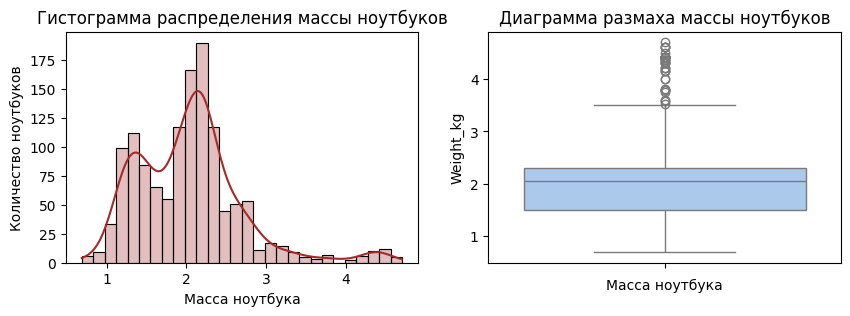

In [26]:
fig = plt.figure(figsize=(10, 3))
axes = fig.subplots(1, 2)
sns.histplot(data['Weight_kg'], kde=True, color='brown', alpha=0.3, ax=axes[0])
axes[0].title.set_text(f"Гистограмма распределения массы ноутбуков")
axes[0].set_xlabel('Масса ноутбука')
axes[0].set_ylabel('Количество ноутбуков')
sns.boxplot(data['Weight_kg'], palette='pastel', ax=axes[1])
axes[1].title.set_text(f"Диаграмма размаха массы ноутбуков")
axes[1].set_xlabel('Масса ноутбука')
plt.show();

In [27]:
K = 1.5
col = 'Weight_kg'
IQR = data[col].quantile(0.75) - data[col].quantile(0.25)
lower_boundary = data[col].quantile(0.25) - (K * IQR)
upper_boundary = data[col].quantile(0.75) + (K * IQR)
round(lower_boundary, 2), round(upper_boundary, 2)

(0.3, 3.5)

In [28]:
data[col] = np.where(data[col] > upper_boundary, upper_boundary, np.where(data[col] < lower_boundary, lower_boundary, data[col]))

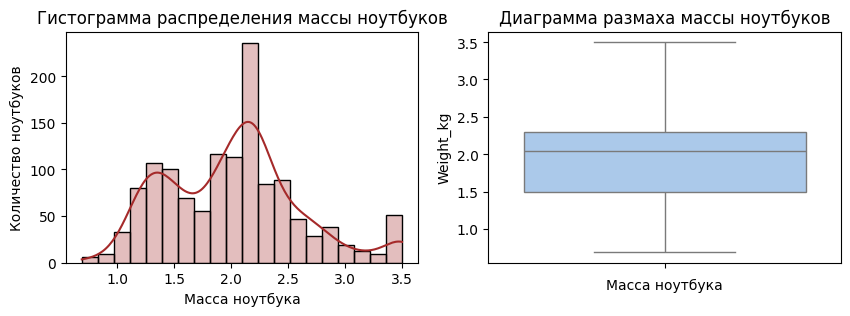

In [29]:
fig = plt.figure(figsize=(10, 3))
axes = fig.subplots(1, 2)
sns.histplot(data['Weight_kg'], kde=True, color='brown', alpha=0.3, ax=axes[0])
axes[0].title.set_text(f"Гистограмма распределения массы ноутбуков")
axes[0].set_xlabel('Масса ноутбука')
axes[0].set_ylabel('Количество ноутбуков')
sns.boxplot(data['Weight_kg'], palette='pastel', ax=axes[1])
axes[1].title.set_text(f"Диаграмма размаха массы ноутбуков")
axes[1].set_xlabel('Масса ноутбука')
plt.show();

Удаление выбросов

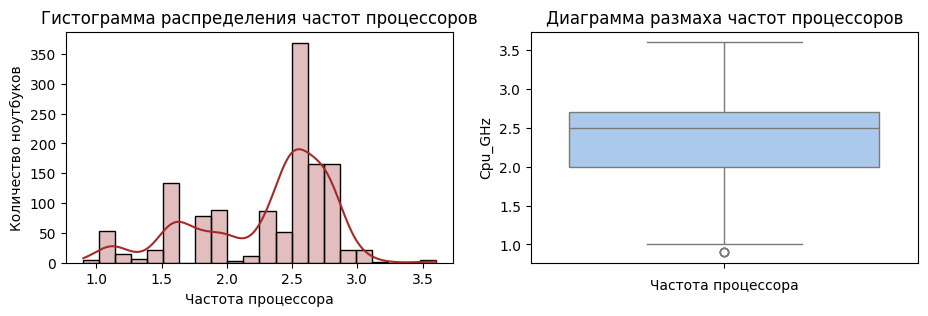

In [30]:
fig = plt.figure(figsize=(11, 3))
axes = fig.subplots(1, 2)
sns.histplot(data['Cpu_GHz'], kde=True, color='brown', alpha=0.3, ax=axes[0])
axes[0].title.set_text(f"Гистограмма распределения частот процессоров")
axes[0].set_xlabel('Частота процессора')
axes[0].set_ylabel('Количество ноутбуков')
sns.boxplot(data['Cpu_GHz'], palette='pastel', ax=axes[1])
axes[1].title.set_text(f"Диаграмма размаха частот процессоров")
axes[1].set_xlabel('Частота процессора')
plt.show();

In [31]:
K = 1.5
col = 'Cpu_GHz'
IQR = data[col].quantile(0.75) - data[col].quantile(0.25)
lower_boundary = data[col].quantile(0.25) - (K * IQR)
upper_boundary = data[col].quantile(0.75) + (K * IQR)
round(lower_boundary, 2), round(upper_boundary, 2)

(0.95, 3.75)

In [32]:
data[data['Cpu_GHz'] < 0.95]

,laptop_ID,Company,Product,TypeName,Inches,Ram_GB,OpSys,Weight_kg,Price_euros,ScreenType,...,ScreenRes,Cpu_type,Cpu_GHz,Gpu_producer,Gpu_model,Memory1_GB,Memory1_type,Memory2_GB,Memory2_type,Memory2
697,705,Asus,Chromebook Flip,2 in 1 Convertible,12.5,4,Chrome OS,1.2,669.0,Full HD / Touchscreen,...,1920x1080,Intel Core M M3-6Y30,0.9,Intel,HD Graphics 515,64,Flash Storage,0,-,-
1261,1279,Asus,ZenBook UX305CA-UBM1,Ultrabook,13.3,8,Windows 10,1.2,729.0,IPS Panel Full HD,...,1920x1080,Intel Core M 6Y30,0.9,Intel,HD Graphics 515,512,SSD,0,-,-
1275,1293,Asus,ZenBook UX305CA-UBM1,Ultrabook,13.3,8,Windows 10,1.2,729.0,IPS Panel Full HD,...,1920x1080,Intel Core M 6Y30,0.9,Intel,HD Graphics 515,512,SSD,0,-,-
1289,1307,Asus,ZenBook UX305CA-UBM1,Ultrabook,13.3,8,Windows 10,1.2,729.0,IPS Panel Full HD,...,1920x1080,Intel Core M 6Y30,0.9,Intel,HD Graphics 515,512,SSD,0,-,-


In [33]:
data[(data['Cpu_GHz'] < 0.95)].index

Int64Index([697, 1261, 1275, 1289], dtype='int64')

In [34]:
data.drop(data[data['Cpu_GHz'] < 0.95].index, inplace=True)

## Масштабирование признаков

In [35]:
numeric_columns = [column for column in data.columns if data.dtypes[column] != object]

StandardScaler

In [36]:
data1 = pd.DataFrame(StandardScaler().fit_transform(data[numeric_columns]), columns=numeric_columns);
data1.head()

,laptop_ID,Inches,Ram_GB,Weight_kg,Price_euros,ScreenWidth,ScreenHeight,Cpu_GHz,Memory1_GB,Memory2_GB
0,-1.728896,-1.210175,-0.075938,-1.096730,0.307017,1.343457,1.857830,-0.006147,-0.873503,-0.418826
1,-1.726267,-1.210175,-0.075938,-1.147628,-0.323126,-0.918210,-0.599627,-1.004294,-0.873503,-0.418826
2,-1.723639,0.405176,-0.075938,-0.265396,-0.786266,0.051076,0.032290,0.393111,-0.524055,-0.418826
3,-1.721010,0.264711,1.496066,-0.316294,2.019464,1.989648,2.559960,0.792370,0.174842,-0.418826
4,-1.718381,-1.210175,-0.075938,-1.096730,0.970273,1.343457,1.857830,1.590887,-0.524055,-0.418826


In [37]:
data1.describe()

,laptop_ID,Inches,Ram_GB,Weight_kg,Price_euros,ScreenWidth,ScreenHeight,Cpu_GHz,Memory1_GB,Memory2_GB
count,1.299000e+03,1.299000e+03,1.299000e+03,1.299000e+03,1.299000e+03,1.299000e+03,1.299000e+03,1.299000e+03,1.299000e+03,1.299000e+03
mean,8.751874e-17,-2.352066e-16,-1.723025e-16,-3.199904e-16,1.476879e-16,-6.290409e-17,2.652912e-16,-1.531578e-16,-6.153661e-17,1.367480e-18
std,1.000385e+00,1.000385e+00,1.000385e+00,1.000385e+00,1.000385e+00,1.000385e+00,1.000385e+00,1.000385e+00,1.000385e+00,1.000385e+00
min,-1.728896e+00,-3.457619e+00,-1.254941e+00,-2.250418e+00,-1.359578e+00,-1.067642e+00,-1.063033e+00,-2.601328e+00,-1.201110e+00,-4.188258e-01
25%,-8.626864e-01,-7.185464e-01,-8.619398e-01,-8.761720e-01,-7.519526e-01,-5.951147e-01,-5.996271e-01,-6.050350e-01,-5.240545e-01,-4.188258e-01
50%,-4.363222e-03,4.051758e-01,-7.593784e-02,3.999223e-02,-2.086637e-01,5.107592e-02,3.229044e-02,3.931114e-01,-5.240545e-01,-4.188258e-01
75%,8.671043e-01,4.051758e-01,-7.593784e-02,4.811083e-01,5.211948e-01,5.107592e-02,3.229044e-02,7.923699e-01,1.748418e-01,-4.188258e-01
max,1.738572e+00,2.371690e+00,1.092809e+01,2.517029e+00,7.111439e+00,3.928220e+00,3.823795e+00,2.589033e+00,4.368220e+00,4.544575e+00


MinMaxScaler

In [38]:
data2 = pd.DataFrame(MinMaxScaler().fit_transform(data[numeric_columns]), columns=numeric_columns);
data2.head()

,laptop_ID,Inches,Ram_GB,Weight_kg,Price_euros,ScreenWidth,ScreenHeight,Cpu_GHz,Memory1_GB,Memory2_GB
0,0.000000,0.385542,0.096774,0.241993,0.196741,0.482619,0.597701,0.500000,0.058824,0.0
1,0.000758,0.385542,0.096774,0.231317,0.122353,0.029911,0.094828,0.307692,0.058824,0.0
2,0.001516,0.662651,0.096774,0.416370,0.067679,0.223929,0.224138,0.576923,0.121569,0.0
3,0.002274,0.638554,0.225806,0.405694,0.398895,0.611964,0.741379,0.653846,0.247059,0.0
4,0.003033,0.385542,0.096774,0.241993,0.275038,0.482619,0.597701,0.807692,0.121569,0.0


In [39]:
data2.describe()

,laptop_ID,Inches,Ram_GB,Weight_kg,Price_euros,ScreenWidth,ScreenHeight,Cpu_GHz,Memory1_GB,Memory2_GB
count,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000
mean,0.498605,0.593144,0.103007,0.472038,0.160498,0.213705,0.217530,0.501184,0.215665,0.084383
std,0.288506,0.171613,0.082113,0.209837,0.118095,0.200243,0.204710,0.192739,0.179624,0.201552
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.249810,0.469880,0.032258,0.288256,0.071730,0.094584,0.094828,0.384615,0.121569,0.000000
50%,0.497346,0.662651,0.096774,0.480427,0.135865,0.223929,0.224138,0.576923,0.121569,0.000000
75%,0.748673,0.662651,0.096774,0.572954,0.222024,0.223929,0.224138,0.653846,0.247059,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


RobustScaler

In [40]:
data3 = pd.DataFrame(RobustScaler().fit_transform(data[numeric_columns]), columns=numeric_columns);
data3.head()

,laptop_ID,Inches,Ram_GB,Weight_kg,Price_euros,ScreenWidth,ScreenHeight,Cpu_GHz,Memory1_GB,Memory2_GB
0,-0.996960,-1.4375,0.0,-0.8375,0.405044,2.0,2.888889,-0.285714,-0.5,0.0
1,-0.995441,-1.4375,0.0,-0.8750,-0.089905,-1.5,-1.000000,-1.000000,-0.5,0.0
2,-0.993921,0.0000,0.0,-0.2250,-0.453680,0.0,0.000000,0.000000,0.0,0.0
3,-0.992401,-0.1250,2.0,-0.2625,1.750094,3.0,4.000000,0.285714,1.0,0.0
4,-0.990881,-1.4375,0.0,-0.8375,0.926002,2.0,2.888889,0.857143,0.0,0.0


In [41]:
data3.describe()

,laptop_ID,Inches,Ram_GB,Weight_kg,Price_euros,ScreenWidth,ScreenHeight,Cpu_GHz,Memory1_GB,Memory2_GB
count,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000
mean,0.002522,-0.360566,0.096613,-0.029465,0.163896,-0.079042,-0.051099,-0.281315,0.749832,172.816012
std,0.578327,0.890242,1.272751,0.737051,0.785758,1.548127,1.583095,0.715888,1.431378,412.779207
min,-0.996960,-3.437500,-1.500000,-1.687500,-0.903992,-1.731250,-1.733333,-2.142857,-0.968750,0.000000
25%,-0.496201,-1.000000,-1.000000,-0.675000,-0.426729,-1.000000,-1.000000,-0.714286,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.503799,0.000000,0.000000,0.325000,0.573271,0.000000,0.000000,0.285714,1.000000,0.000000
max,1.007599,1.750000,14.000000,1.825000,5.749611,6.000000,6.000000,1.571429,7.000000,2048.000000


## Отбор признаков

Метод фильтрации

In [42]:
print(f'Всего записей: {data.shape[0]}')
print('--------------------')
for column in data.columns:
    print(f'{column}: {data[column].value_counts().count()} уникальных значений', end='\n\n')

Всего записей: 1299
--------------------
laptop_ID: 1299 уникальных значений

Company: 19 уникальных значений

Product: 617 уникальных значений

TypeName: 6 уникальных значений

Inches: 18 уникальных значений

Ram_GB: 9 уникальных значений

OpSys: 9 уникальных значений

Weight_kg: 155 уникальных значений

Price_euros: 790 уникальных значений

ScreenType: 21 уникальных значений

ScreenWidth: 13 уникальных значений

ScreenHeight: 10 уникальных значений

ScreenRes: 15 уникальных значений

Cpu_type: 91 уникальных значений

Cpu_GHz: 24 уникальных значений

Gpu_producer: 4 уникальных значений

Gpu_model: 110 уникальных значений

Memory1_GB: 13 уникальных значений

Memory1_type: 4 уникальных значений

Memory2_GB: 6 уникальных значений

Memory2_type: 4 уникальных значений

Memory2: 7 уникальных значений



In [43]:
data.drop('laptop_ID', axis=1, inplace=True)

In [44]:
data.corr()

,Inches,Ram_GB,Weight_kg,Price_euros,ScreenWidth,ScreenHeight,Cpu_GHz,Memory1_GB,Memory2_GB
Inches,1.000000,0.237365,0.865295,0.065966,-0.071240,-0.095546,0.300841,0.269681,0.386133
Ram_GB,0.237365,1.000000,0.327808,0.743089,0.433292,0.424588,0.370172,0.015448,0.391656
Weight_kg,0.865295,0.327808,1.000000,0.145113,-0.060131,-0.082654,0.317048,0.209976,0.460859
Price_euros,0.065966,0.743089,0.145113,1.000000,0.556920,0.553162,0.430624,-0.125784,0.294454
ScreenWidth,-0.071240,0.433292,-0.060131,0.556920,1.000000,0.994219,0.186185,-0.075433,0.148548
ScreenHeight,-0.095546,0.424588,-0.082654,0.553162,0.994219,1.000000,0.171977,-0.082520,0.137872
Cpu_GHz,0.300841,0.370172,0.317048,0.430624,0.186185,0.171977,1.000000,0.064683,0.223192
Memory1_GB,0.269681,0.015448,0.209976,-0.125784,-0.075433,-0.082520,0.064683,1.000000,-0.244857
Memory2_GB,0.386133,0.391656,0.460859,0.294454,0.148548,0.137872,0.223192,-0.244857,1.000000


Для удобства анализа полученной таблицы построим по ней тепловую карту.

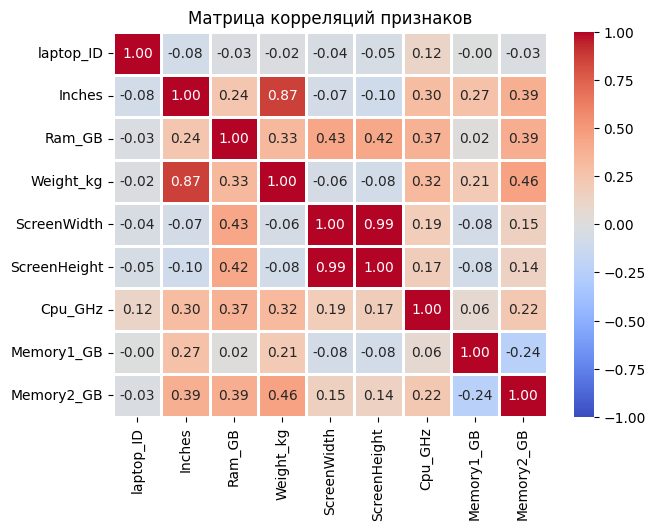

In [45]:
plt.figure(figsize=(7, 5))
sns.heatmap(data1.drop('Price_euros', axis=1).corr(), vmin=-1, vmax=1, annot=True, cmap='coolwarm', fmt='.2f', linewidth=1)
plt.title('Матрица корреляций признаков');

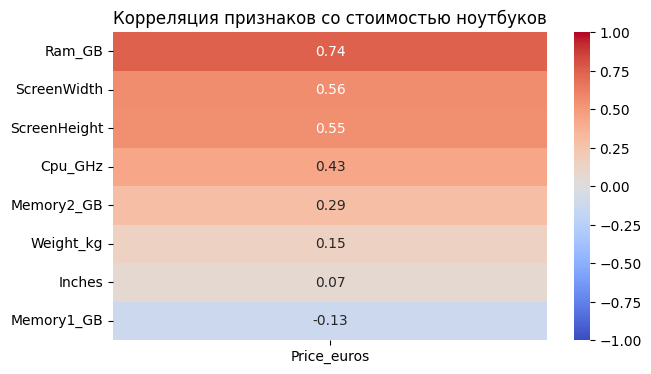

In [46]:
plt.figure(figsize=(7, 4))
sns.heatmap(pd.DataFrame(data.corr()['Price_euros'].sort_values(ascending=False)[1:]), vmin=-1, vmax=1, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Корреляция признаков со стоимостью ноутбуков');

In [47]:
columns1 = ['Ram_GB', 'ScreenWidth', 'Cpu_GHz']
columns1

['Ram_GB', 'ScreenWidth', 'Cpu_GHz']

Метод обёртывания

In [53]:
numeric_columns.remove('Price_euros')
numeric_columns.remove('laptop_ID')

In [54]:
Combi().fit(np.array(data[numeric_columns]), data['Price_euros']).get_best_polynomial()

'y = - 25.7687*x1 + 87.3088*x2 + 0.4038*x4 + 222.1438*x6 - 0.1591*x7 - 477.4711'

In [55]:
columns2 = [numeric_columns[i-1] for i in [1, 2, 4, 6, 7]]
columns2

['Inches', 'Ram_GB', 'ScreenWidth', 'Cpu_GHz', 'Memory1_GB']

Метод вложений

In [57]:
e_ls1 = Lasso(random_state=1)
e_ls1.fit(data[numeric_columns], data['Price_euros'])
list(zip(numeric_columns, e_ls1.coef_))

[('Inches', -37.24687781964683),
 ('Ram_GB', 80.20302221107579),
 ('Weight_kg', 5.585978741036169),
 ('ScreenWidth', 0.0014551653704865711),
 ('ScreenHeight', 0.628803904078902),
 ('Cpu_GHz', 277.98973646115724),
 ('Memory1_GB', -0.21083188632964492),
 ('Memory2_GB', -0.023584413124236935)]

In [58]:
sel_e_ls1 = SelectFromModel(e_ls1)
sel_e_ls1.fit(data[numeric_columns], data['Price_euros'])
list(zip(numeric_columns, sel_e_ls1.get_support()))

[('Inches', True),
 ('Ram_GB', True),
 ('Weight_kg', True),
 ('ScreenWidth', True),
 ('ScreenHeight', True),
 ('Cpu_GHz', True),
 ('Memory1_GB', True),
 ('Memory2_GB', True)]

In [59]:
columns3 = numeric_columns
columns3

['Inches',
 'Ram_GB',
 'Weight_kg',
 'ScreenWidth',
 'ScreenHeight',
 'Cpu_GHz',
 'Memory1_GB',
 'Memory2_GB']